In [62]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import morton

# Initialize

## Constants

In [63]:
LANE_CHANGE_DATA_DIR = './data/lane_changes/'
OFFSET = 10
FACTOR_MULTIPLY = 10000

## Dataframes

In [64]:
laneChangeDFs = [] # Will contain the dataframes for all lane changes.

# Count number of files (= amt of lane changes)
numOfFiles = len([f for f in os.listdir(LANE_CHANGE_DATA_DIR) if os.path.isfile(os.path.join(LANE_CHANGE_DATA_DIR, f))])


# Import each csv into a dataframe
for i in range(numOfFiles):
    temp_df = pd.read_csv(LANE_CHANGE_DATA_DIR + "lane_change_" + str(i+1) + ".csv", sep=";")
    laneChangeDFs.append(temp_df)

In [65]:
laneChangeDFs[0] # test to see if a dataframe is correct.
    

,lat,lon,speed,accel_lon,accel_trans,accel_down,ts
0,57.718799,11.958346,0.116811,-0.006275,0.003880,-0.004212,1646666793703590
1,57.718799,11.958346,0.118460,-0.047546,0.064689,0.067094,1646666793753601
2,57.718799,11.958346,0.118331,0.036616,-0.010786,-0.050694,1646666793803626
3,57.718799,11.958346,0.119788,-0.102828,0.029938,0.083196,1646666793853591
4,57.718799,11.958346,0.119016,0.039307,-0.071447,-0.126803,1646666793903600
...,...,...,...,...,...,...,...
345,57.719002,11.956873,10.502030,1.272900,0.097373,0.266211,1646666810954140
346,57.719003,11.956865,10.442500,1.212828,0.109282,0.064465,1646666811004191
347,57.719005,11.956856,10.379370,1.141930,0.053132,0.029888,1646666811054149
348,57.719006,11.956848,10.317210,1.224668,0.113335,0.232543,1646666811104176


## Morton setup

In [66]:
for df in laneChangeDFs:
    df['accel_lon'] = df['accel_lon'].add(OFFSET)
    df['accel_trans'] = df['accel_trans'].add(OFFSET)
    df['accel_down'] = df['accel_down'].add(OFFSET)

    df['accel_lon'] = df.apply(lambda x: int(x['accel_lon']*FACTOR_MULTIPLY) , axis=1)
    df['accel_trans'] = df.apply(lambda x: int(x['accel_trans']*FACTOR_MULTIPLY) , axis=1)
    df['accel_down'] = df.apply(lambda x: int(x['accel_down']*FACTOR_MULTIPLY) , axis=1)



In [67]:
m = morton.Morton(dimensions=2, bits=18)

def set_value(row):
    return m.pack(int(row['accel_lon']), int(row['accel_trans']))

for df in laneChangeDFs:
    df['morton'] = df.apply(set_value, axis=1)

laneChangeDFs[0]

,lat,lon,speed,accel_lon,accel_trans,accel_down,ts,morton
0,57.718799,11.958346,0.116811,99937,100038,99957,1646666793703590,16110105641
1,57.718799,11.958346,0.118460,99524,100646,100670,1646666793753601,16115718200
2,57.718799,11.958346,0.118331,100366,99892,99493,1646666793803626,16112945780
3,57.718799,11.958346,0.119788,98971,100299,100831,1646666793853591,16109199823
4,57.718799,11.958346,0.119016,100393,99285,98731,1646666793903600,16111019619
...,...,...,...,...,...,...,...,...
345,57.719002,11.956873,10.502030,112729,100973,102662,1646666810954140,16203135459
346,57.719003,11.956865,10.442500,112128,101092,100644,1646666811004191,16200280096
347,57.719005,11.956856,10.379370,111419,100531,100298,1646666811054149,16198766415
348,57.719006,11.956848,10.317210,112246,101133,102325,1646666811104176,16200373686


# CSPs

Lane change file - 1: 


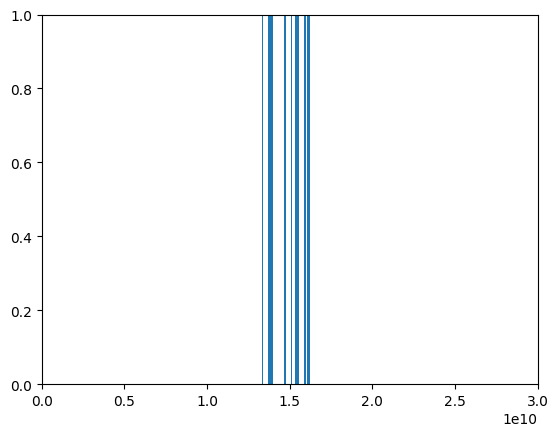

-----------------------------
Lane change file - 2: 


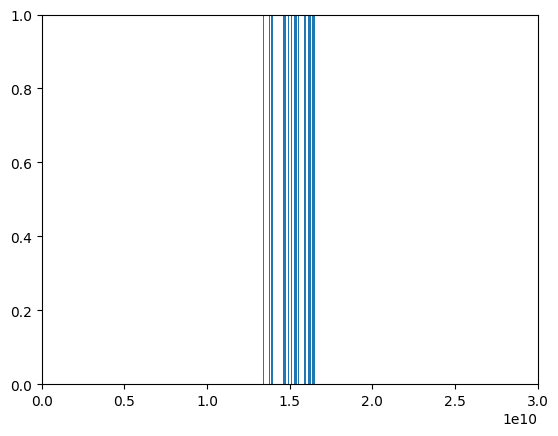

-----------------------------
Lane change file - 3: 


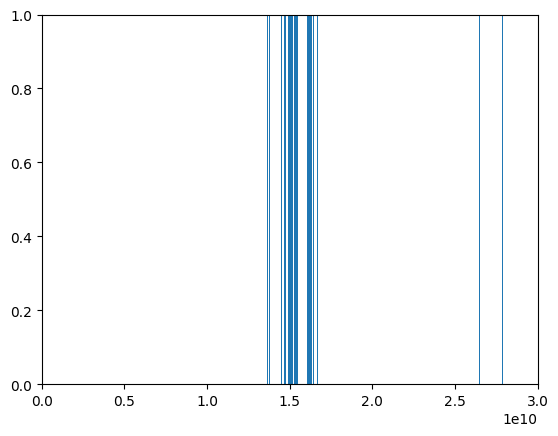

-----------------------------
Lane change file - 4: 


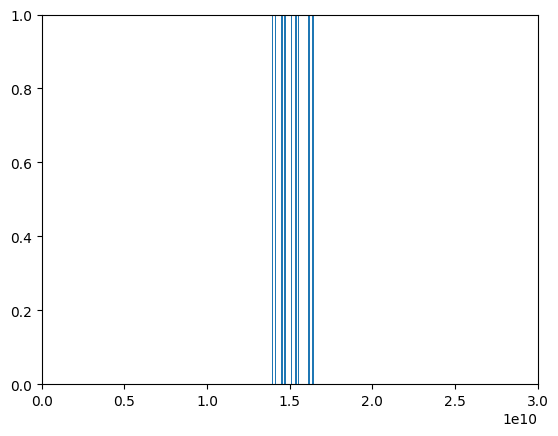

-----------------------------
Lane change file - 5: 


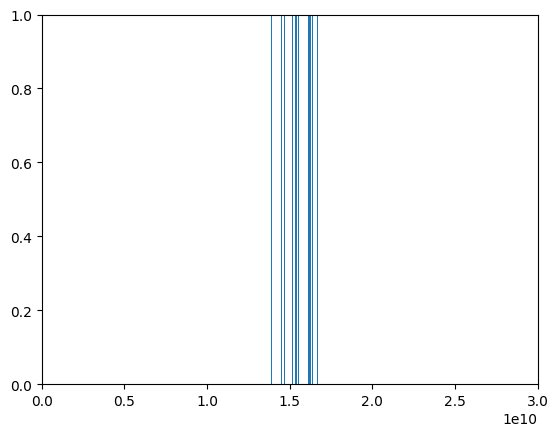

-----------------------------
Lane change file - 6: 


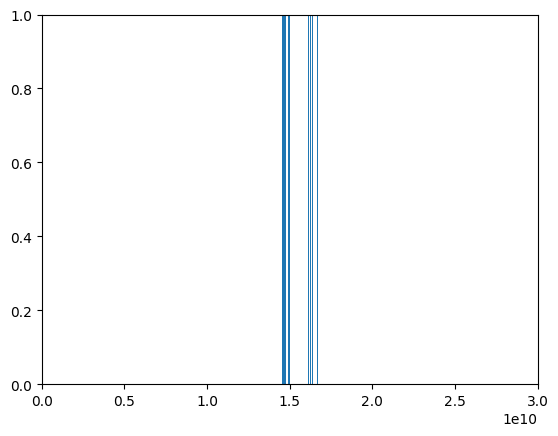

-----------------------------
Lane change file - 7: 


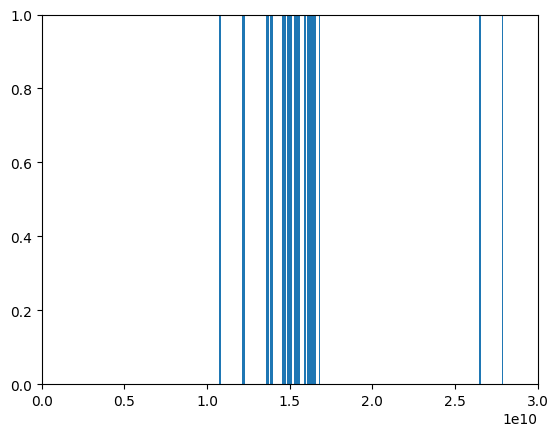

-----------------------------
Lane change file - 8: 


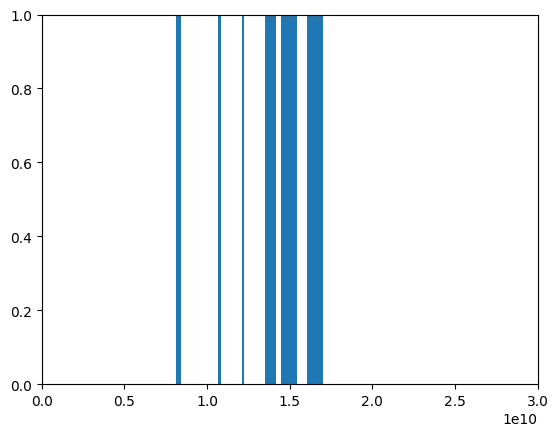

-----------------------------
Lane change file - 9: 


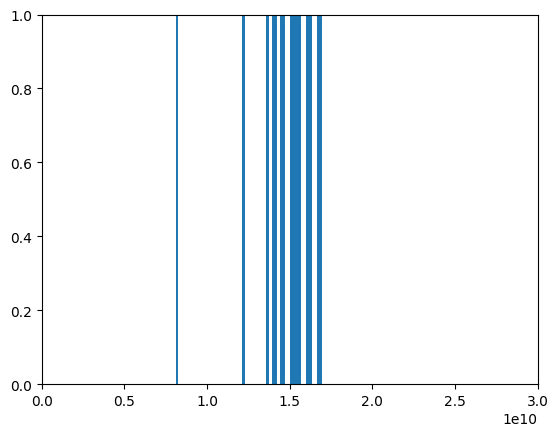

-----------------------------


In [76]:
lcCounter = 1 # used to track which lane change the CSP corresponds to.

for df in laneChangeDFs:
    print("Lane change file - " + str(lcCounter) + ": ")
    
    min = df['morton'].min()
    max = df['morton'].max()
    max = 30000000000
    
    plt.hist(df['morton'], bins=200)
    plt.xlim(0,max)
    plt.ylim(0,1)
    plt.show()
    
    print("-----------------------------")
    
    lcCounter += 1